In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Amazon Employee Access Challenge

## Overview

When an employee at any company starts work, they first need to obtain the computer access necessary to fulfill their role. This access may allow an employee to read/manipulate resources through various applications or web portals. It is assumed that employees fulfilling the functions of a given role will access the same or similar resources. It is often the case that employees figure out the access they need as they encounter roadblocks during their daily work (e.g. not able to log into a reporting portal). A knowledgeable supervisor then takes time to manually grant the needed access in order to overcome access obstacles. As employees move throughout a company, this access discovery/recovery cycle wastes a nontrivial amount of time and money.

There is a considerable amount of data regarding an employee’s role within an organization and the resources to which they have access. Given the data related to current employees and their provisioned access, models can be built that automatically determine access privileges as employees enter and leave roles within a company. These auto-access models seek to minimize the human involvement required to grant or revoke employee access.

## Objective

The objective of this competition is to build a model, learned using historical data, that will determine an employee's access needs, such that manual access transactions (grants and revokes) are minimized as the employee's attributes change over time. The model will take an employee's role information and a resource code and will return whether or not access should be granted.

## ML Problem

So our aim is to develop a Machine Learning model that takes an employee’s access request as input which contains details about the employee’s attributes like role, department etc.. and the model has to decide whether to provide access or not. Here the dataset provided by Amazon contains real historic data collected from 2010 and 2011.The Performance metric used in this case study is AUC score.

## Data Information

https://www.kaggle.com/c/amazon-employee-access-challenge/data

### Data Description

The data consists of real historical data collected from 2010 & 2011.  Employees are manually allowed or denied access to resources over time. You must create an algorithm capable of learning from this historical data to predict approval/denial for an unseen set of employees. 

### File Descriptions

train.csv - The training set. Each row has the ACTION (ground truth), RESOURCE, and information about the employee's role at the time of approval

test.csv - The test set for which predictions should be made.  Each row asks whether an employee having the listed characteristics should have access to the listed resource.

### Column Descriptions


<table>
    <tr>
        <td><b>Column Name</b></td>
        <td><b>Description</b></td>
    </tr>
    <tr>
        <td>ACTION</td>
        <td>ACTION is 1 if the resource was approved, 0 if the resource was not</td>
    </tr>
    <tr>
        <td>RESOURCE</td>
        <td>An ID for each resource</td>
    </tr>
    <tr>
        <td>MGR_ID</td>
        <td>The EMPLOYEE ID of the manager of the current EMPLOYEE ID record; an employee may have only one manager at a time</td>
    </tr>
    <tr>
        <td>ROLE_ROLLUP_1</td>
        <td>Company role grouping category id 1 (e.g. US Engineering)</td>
    </tr>
    <tr>
        <td>ROLE_ROLLUP_2</td>
        <td>Company role grouping category id 2 (e.g. US Retail)</td>
    </tr>
    <tr>
        <td>ROLE_DEPTNAME</td>
        <td>Company role department description (e.g. Retail)</td>
    </tr>
    <tr>
        <td>ROLE_TITLE</td>
        <td>Company role business title description (e.g. Senior Engineering Retail Manager)</td>
    </tr>
    <tr>
        <td>ROLE_FAMILY_DESC</td>
        <td>Company role family extended description (e.g. Retail Manager, Software Engineering)</td>
    </tr>
    <tr>
        <td>ROLE_FAMILY</td>
        <td>Company role family description (e.g. Retail Manager)</td>
    </tr>
    <tr>
        <td>ROLE_CODE</td>
        <td>Company role code; this code is unique to each role (e.g. Manager)</td>
    </tr>
</table>

# Data Analysis

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
train.shape

(32769, 10)

In [4]:
test.shape

(58921, 10)

#### Train Data Analysis

In [5]:
train.columns

Index(['ACTION', 'RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2',
       'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY',
       'ROLE_CODE'],
      dtype='object')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32769 entries, 0 to 32768
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ACTION            32769 non-null  int64
 1   RESOURCE          32769 non-null  int64
 2   MGR_ID            32769 non-null  int64
 3   ROLE_ROLLUP_1     32769 non-null  int64
 4   ROLE_ROLLUP_2     32769 non-null  int64
 5   ROLE_DEPTNAME     32769 non-null  int64
 6   ROLE_TITLE        32769 non-null  int64
 7   ROLE_FAMILY_DESC  32769 non-null  int64
 8   ROLE_FAMILY       32769 non-null  int64
 9   ROLE_CODE         32769 non-null  int64
dtypes: int64(10)
memory usage: 2.5 MB


In [7]:
train.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [8]:
train.describe()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
count,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000
mean,0.942110,42923.916171,25988.957979,116952.627788,118301.823156,118912.779914,125916.152644,170178.369648,183703.408893,119789.430132
std,0.233539,34173.892702,35928.031650,10875.563591,4551.588572,18961.322917,31036.465825,69509.462130,100488.407413,5784.275516
min,0.000000,0.000000,25.000000,4292.000000,23779.000000,4674.000000,117879.000000,4673.000000,3130.000000,117880.000000
25%,1.000000,20299.000000,4566.000000,117961.000000,118102.000000,118395.000000,118274.000000,117906.000000,118363.000000,118232.000000
50%,1.000000,35376.000000,13545.000000,117961.000000,118300.000000,118921.000000,118568.000000,128696.000000,119006.000000,118570.000000
75%,1.000000,74189.000000,42034.000000,117961.000000,118386.000000,120535.000000,120006.000000,235280.000000,290919.000000,119348.000000
max,1.000000,312153.000000,311696.000000,311178.000000,286791.000000,286792.000000,311867.000000,311867.000000,308574.000000,270691.000000


In [9]:
# unique values
for i in train:
    print(i, len(train[i].unique()))

ACTION 2
RESOURCE 7518
MGR_ID 4243
ROLE_ROLLUP_1 128
ROLE_ROLLUP_2 177
ROLE_DEPTNAME 449
ROLE_TITLE 343
ROLE_FAMILY_DESC 2358
ROLE_FAMILY 67
ROLE_CODE 343


ROLE_TITLE and ROLE_CODE columns has same no. of entries, In other words we can say both columns are same. ACTION is our class label.

In [10]:
train.isna().sum()

ACTION              0
RESOURCE            0
MGR_ID              0
ROLE_ROLLUP_1       0
ROLE_ROLLUP_2       0
ROLE_DEPTNAME       0
ROLE_TITLE          0
ROLE_FAMILY_DESC    0
ROLE_FAMILY         0
ROLE_CODE           0
dtype: int64

In [11]:
train.duplicated().sum()

0

There is no duplicated and missing values in the train dataset

#### Test Data Analysis

In [12]:
test.columns

Index(['id', 'RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2',
       'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY',
       'ROLE_CODE'],
      dtype='object')

In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58921 entries, 0 to 58920
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                58921 non-null  int64
 1   RESOURCE          58921 non-null  int64
 2   MGR_ID            58921 non-null  int64
 3   ROLE_ROLLUP_1     58921 non-null  int64
 4   ROLE_ROLLUP_2     58921 non-null  int64
 5   ROLE_DEPTNAME     58921 non-null  int64
 6   ROLE_TITLE        58921 non-null  int64
 7   ROLE_FAMILY_DESC  58921 non-null  int64
 8   ROLE_FAMILY       58921 non-null  int64
 9   ROLE_CODE         58921 non-null  int64
dtypes: int64(10)
memory usage: 4.5 MB


In [14]:
test.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425


In [15]:
test.describe()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
count,58921.000000,58921.000000,58921.000000,58921.000000,58921.000000,58921.000000,58921.000000,58921.000000,58921.00000,58921.000000
mean,29461.000000,39383.739482,26691.645050,117028.638041,118316.334091,118858.006721,126358.019993,170455.861425,179278.05896,119707.754264
std,17009.171942,33717.397122,35110.244281,10805.446548,4284.678750,17916.179109,32068.294507,69684.692799,99639.96530,5326.979178
min,1.000000,0.000000,25.000000,4292.000000,23779.000000,4674.000000,117879.000000,4673.000000,3130.00000,117880.000000
25%,14731.000000,18418.000000,4663.000000,117961.000000,118096.000000,118378.000000,118259.000000,117913.000000,118331.00000,118055.000000
50%,29461.000000,33248.000000,14789.000000,117961.000000,118300.000000,118910.000000,118636.000000,129282.000000,118704.00000,118570.000000
75%,44191.000000,45481.000000,46512.000000,117961.000000,118386.000000,120410.000000,120006.000000,234813.000000,290919.00000,119353.000000
max,58921.000000,312136.000000,311779.000000,311178.000000,194897.000000,277693.000000,311867.000000,311867.000000,308574.00000,270691.000000


In [16]:
# unique value
for i in test:
    print(i, len(test[i].unique()))

id 58921
RESOURCE 4971
MGR_ID 4689
ROLE_ROLLUP_1 126
ROLE_ROLLUP_2 177
ROLE_DEPTNAME 466
ROLE_TITLE 351
ROLE_FAMILY_DESC 2749
ROLE_FAMILY 68
ROLE_CODE 351


In [17]:
test.isna().sum()

id                  0
RESOURCE            0
MGR_ID              0
ROLE_ROLLUP_1       0
ROLE_ROLLUP_2       0
ROLE_DEPTNAME       0
ROLE_TITLE          0
ROLE_FAMILY_DESC    0
ROLE_FAMILY         0
ROLE_CODE           0
dtype: int64

In [18]:
test.duplicated().sum()

0

There is no duplicated and missing values in the test dataset

### Analysing Individual Columns

ACTION

In [19]:
train['ACTION'].value_counts()

1    30872
0     1897
Name: ACTION, dtype: int64

In [20]:
approved_actions = train[train.ACTION==1]

In [21]:
rejected_actions = train[train.ACTION==0]

In [22]:
approved_actions.shape

(30872, 10)

In [23]:
rejected_actions.shape

(1897, 10)

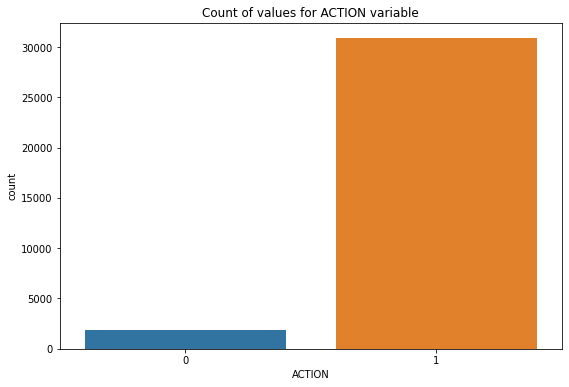

In [24]:
plt.figure(figsize=(9,6));
sb.countplot(x='ACTION',data=train);
plt.title('Count of values for ACTION variable');

As per the graph we have imbalanced data set, frequency of approved requests are much greater than rejected one. So we have to find out some ways to make this dataset balance.

RESOURCE

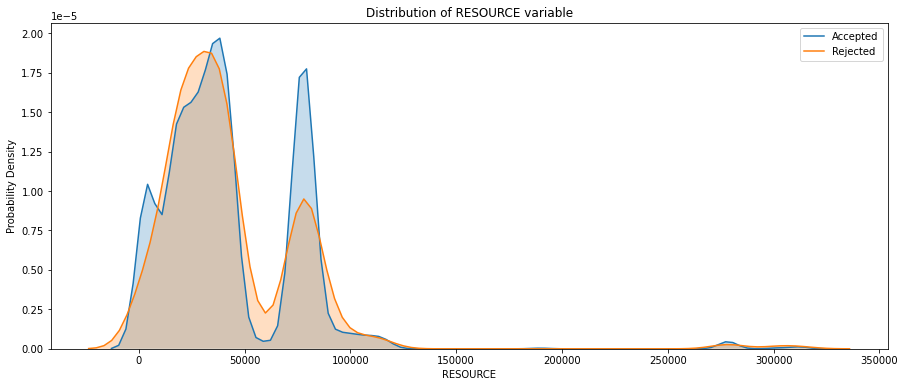

In [25]:
plt.figure(figsize=(15,6));
sb.kdeplot(approved_actions['RESOURCE'],label='Accepted',shade=True);
sb.kdeplot(rejected_actions['RESOURCE'],label='Rejected',shade=True);
plt.title('Distribution of RESOURCE variable');
plt.xlabel('RESOURCE');
plt.ylabel('Probability Density');

In [26]:
# Top five approved requests
approved_actions['RESOURCE'].value_counts()[:5]

4675     836
79092    468
75078    405
3853     398
25993    390
Name: RESOURCE, dtype: int64

In [27]:
# Another Top five approved requests
approved_actions['RESOURCE'].value_counts()[5:10]

75834    294
6977     283
32270    279
42085    237
17308    236
Name: RESOURCE, dtype: int64

In [28]:
# Top five rejected requests
rejected_actions['RESOURCE'].value_counts()[:5]

20897    42
18072    29
13878    22
25993    19
27416    19
Name: RESOURCE, dtype: int64

In [29]:
# Another Top five rejected requests
rejected_actions['RESOURCE'].value_counts()[5:10]

7543     17
79092    16
32270    16
6977     16
32642    13
Name: RESOURCE, dtype: int64

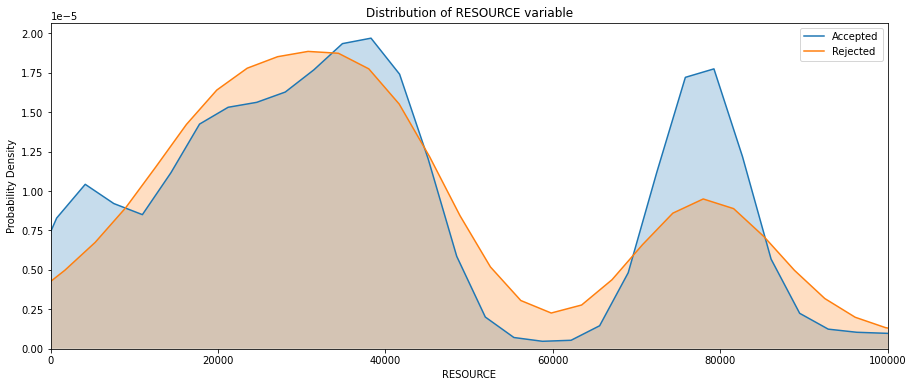

In [30]:
plt.figure(figsize=(15,6));
sb.kdeplot(approved_actions['RESOURCE'],label='Accepted',shade=True);
sb.kdeplot(rejected_actions['RESOURCE'],label='Rejected',shade=True);
plt.title('Distribution of RESOURCE variable');
plt.xlim(0,100000)
plt.xlabel('RESOURCE');
plt.ylabel('Probability Density');

Looking at above KDE plot we can say that b/w 70K-90K Approved requests are higher than the rejected ones

MGR_ID

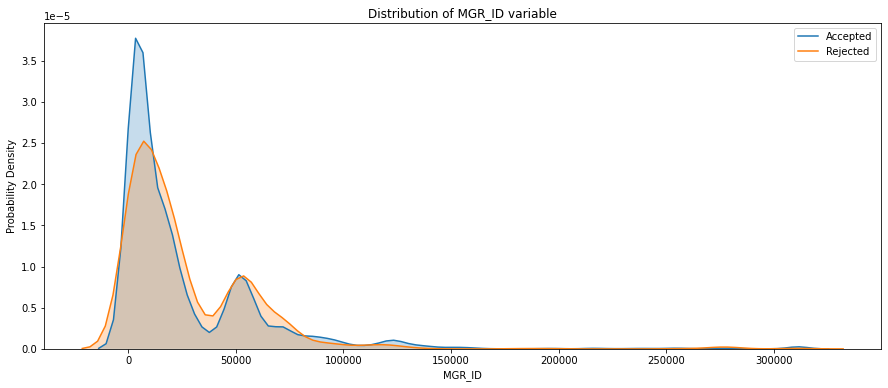

In [31]:
plt.figure(figsize=(15,6));
sb.kdeplot(approved_actions['MGR_ID'],label='Accepted',shade=True);
sb.kdeplot(rejected_actions['MGR_ID'],label='Rejected',shade=True);
plt.title('Distribution of MGR_ID variable');
plt.xlabel('MGR_ID');
plt.ylabel('Probability Density');

In [32]:
# Top 5 Approved Actions for attribute MGR_ID
approved_actions['MGR_ID'].value_counts()[:5]

770     147
2270     96
2594     71
2014     67
1350     67
Name: MGR_ID, dtype: int64

In [33]:
# Top 5 Rejected Actions for attribute MGR_ID
rejected_actions['MGR_ID'].value_counts()[:5]

54618    30
4084     17
46526    16
70062    16
4743     14
Name: MGR_ID, dtype: int64

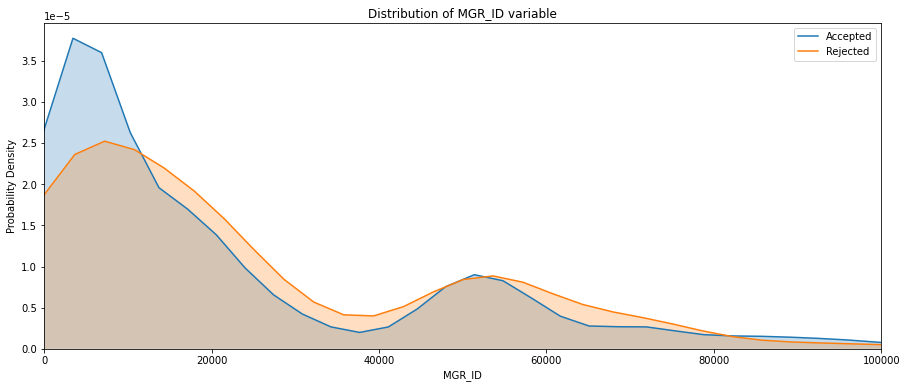

In [34]:
plt.figure(figsize=(15,6));
sb.kdeplot(approved_actions['MGR_ID'],label='Accepted',shade=True);
sb.kdeplot(rejected_actions['MGR_ID'],label='Rejected',shade=True);
plt.title('Distribution of MGR_ID variable');
plt.xlim(0,100000)
plt.xlabel('MGR_ID');
plt.ylabel('Probability Density');

Looking at above KDE plot we can say that b/w 0-20K Approved requests are higher than the rejected ones

ROLE_ROLLUP_1

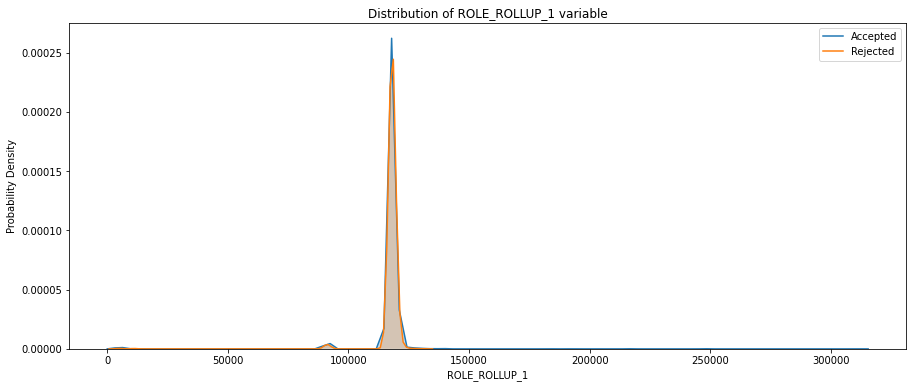

In [35]:
plt.figure(figsize=(15,6));
sb.kdeplot(approved_actions['ROLE_ROLLUP_1'],label='Accepted',shade=True);
sb.kdeplot(rejected_actions['ROLE_ROLLUP_1'],label='Rejected',shade=True);
plt.title('Distribution of ROLE_ROLLUP_1 variable');
plt.xlabel('ROLE_ROLLUP_1');
plt.ylabel('Probability Density');

In [36]:
# Top 5 Approved Actions for attribute ROLE_ROLLUP_1
approved_actions['ROLE_ROLLUP_1'].value_counts()[:5]

117961    20320
117902      714
91261       695
118315      474
118212      385
Name: ROLE_ROLLUP_1, dtype: int64

In [37]:
# Top 5 Rejected Actions for attribute ROLE_ROLLUP_1
rejected_actions['ROLE_ROLLUP_1'].value_counts()[:5]

117961    1087
118256      73
119062      50
118290      44
118079      42
Name: ROLE_ROLLUP_1, dtype: int64

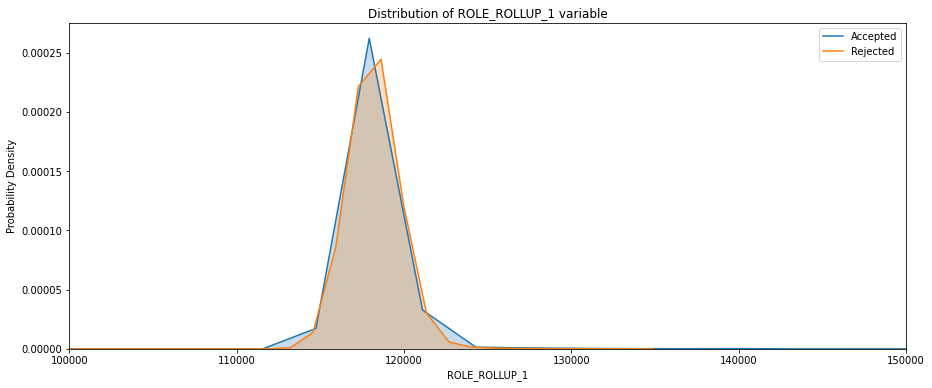

In [38]:
plt.figure(figsize=(15,6));
sb.kdeplot(approved_actions['ROLE_ROLLUP_1'],label='Accepted',shade=True);
sb.kdeplot(rejected_actions['ROLE_ROLLUP_1'],label='Rejected',shade=True);
plt.title('Distribution of ROLE_ROLLUP_1 variable');
plt.xlim(100000,150000)
plt.xlabel('ROLE_ROLLUP_1');
plt.ylabel('Probability Density');

Looking at above KDE plot we can say that trends are almost similar

ROLE_ROLLUP_2

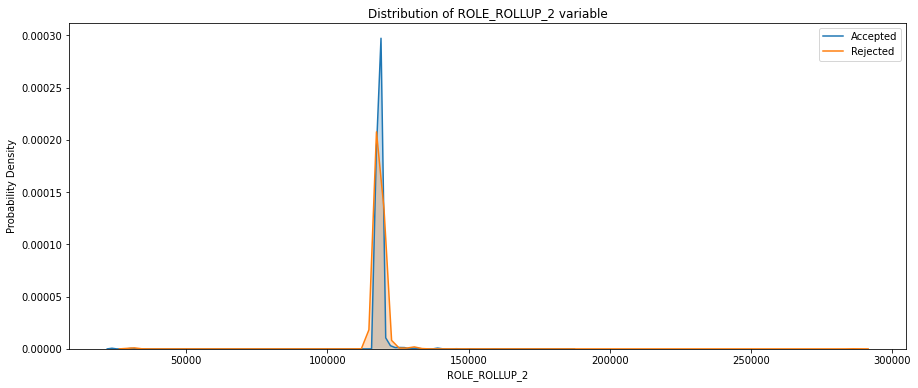

In [39]:
plt.figure(figsize=(15,6));
sb.kdeplot(approved_actions['ROLE_ROLLUP_2'],label='Accepted',shade=True);
sb.kdeplot(rejected_actions['ROLE_ROLLUP_2'],label='Rejected',shade=True);
plt.title('Distribution of ROLE_ROLLUP_2 variable');
plt.xlabel('ROLE_ROLLUP_2');
plt.ylabel('Probability Density');

In [40]:
# Top 5 Approved Actions for attribute ROLE_ROLLUP_2
approved_actions['ROLE_ROLLUP_2'].value_counts()[:5]

118300    4230
118343    3823
118327    2521
118225    2438
118386    1639
Name: ROLE_ROLLUP_2, dtype: int64

In [41]:
# Top 5 Rejected Actions for attribute ROLE_ROLLUP_2
rejected_actions['ROLE_ROLLUP_2'].value_counts()[:5]

118300    194
118052    185
118386    157
118343    122
118327    120
Name: ROLE_ROLLUP_2, dtype: int64

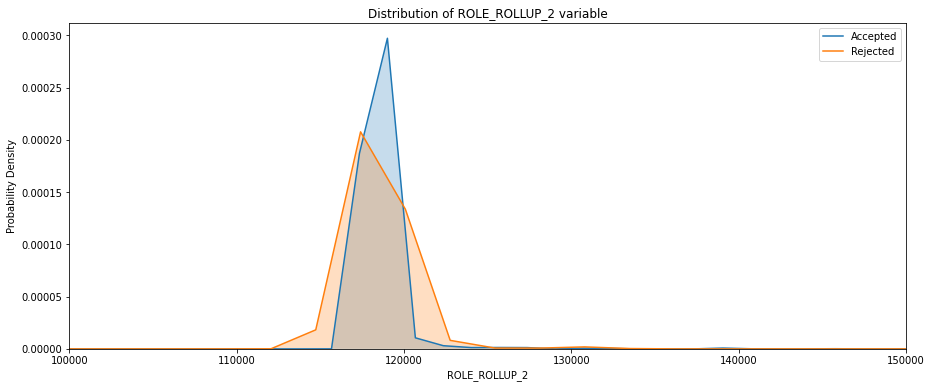

In [42]:
plt.figure(figsize=(15,6));
sb.kdeplot(approved_actions['ROLE_ROLLUP_2'],label='Accepted',shade=True);
sb.kdeplot(rejected_actions['ROLE_ROLLUP_2'],label='Rejected',shade=True);
plt.title('Distribution of ROLE_ROLLUP_2 variable');
plt.xlim(100000, 150000)
plt.xlabel('ROLE_ROLLUP_2');
plt.ylabel('Probability Density');

Looking at above KDE plot we can say that b/w 110K-120K Approved requests are higher than the rejected ones

ROLE_DEPTNAME

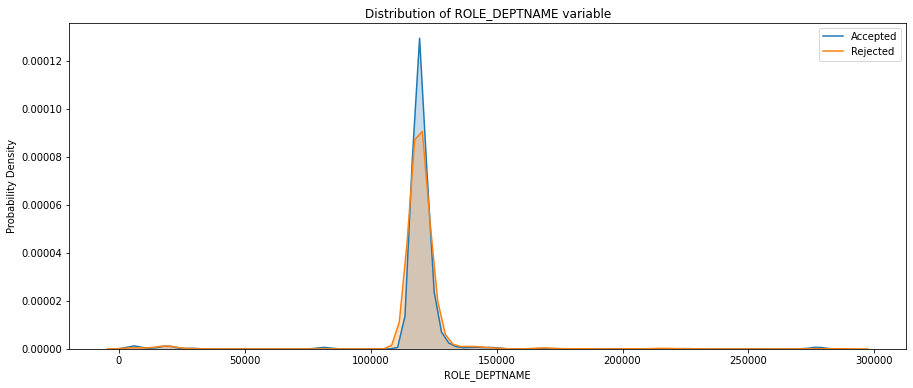

In [43]:
plt.figure(figsize=(15,6));
sb.kdeplot(approved_actions['ROLE_DEPTNAME'],label='Accepted',shade=True);
sb.kdeplot(rejected_actions['ROLE_DEPTNAME'],label='Rejected',shade=True);
plt.title('Distribution of ROLE_DEPTNAME variable');
plt.xlabel('ROLE_DEPTNAME');
plt.ylabel('Probability Density');

In [44]:
# Top 5 Approved Actions for attribute ROLE_DEPTNAME
approved_actions['ROLE_DEPTNAME'].value_counts()[:5]

117878    1064
117941     700
118514     589
117945     570
117920     541
Name: ROLE_DEPTNAME, dtype: int64

In [45]:
# Top 5 Rejected Actions for attribute ROLE_DEPTNAME
rejected_actions['ROLE_DEPTNAME'].value_counts()[:5]

117945    89
118992    77
117878    71
117941    63
117920    56
Name: ROLE_DEPTNAME, dtype: int64

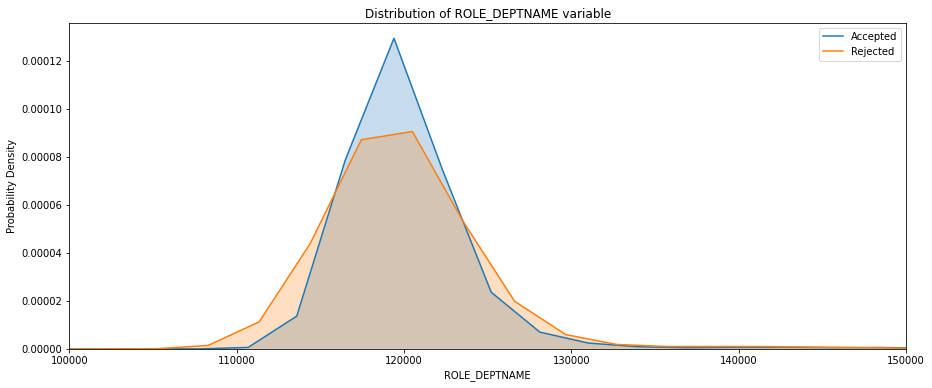

In [46]:
plt.figure(figsize=(15,6));
sb.kdeplot(approved_actions['ROLE_DEPTNAME'],label='Accepted',shade=True);
sb.kdeplot(rejected_actions['ROLE_DEPTNAME'],label='Rejected',shade=True);
plt.title('Distribution of ROLE_DEPTNAME variable');
plt.xlim(100000, 150000)
plt.xlabel('ROLE_DEPTNAME');
plt.ylabel('Probability Density');

Looking at above KDE plot we can say that b/w 110K-130K Approved requests are higher than the rejected ones

ROLE_TITLE

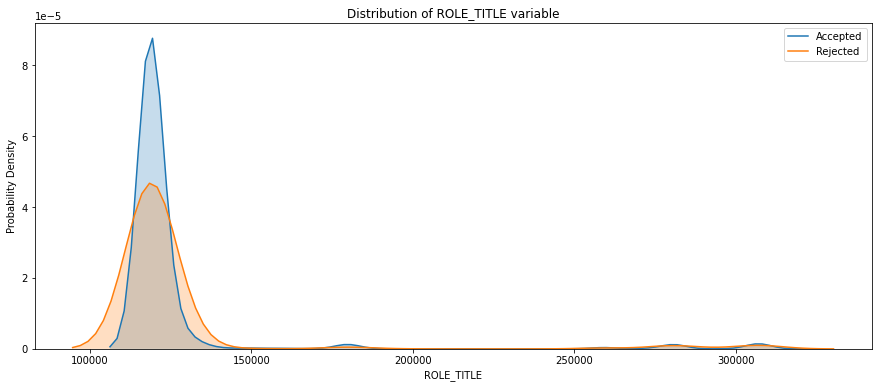

In [47]:
plt.figure(figsize=(15,6));
sb.kdeplot(approved_actions['ROLE_TITLE'],label='Accepted',shade=True);
sb.kdeplot(rejected_actions['ROLE_TITLE'],label='Rejected',shade=True);
plt.title('Distribution of ROLE_TITLE variable');
plt.xlabel('ROLE_TITLE');
plt.ylabel('Probability Density');

In [48]:
# Top 5 Approved Actions for attribute ROLE_TITLE
approved_actions['ROLE_TITLE'].value_counts()[:5]

118321    4279
117905    3467
118784    1647
117879    1117
118568     965
Name: ROLE_TITLE, dtype: int64

In [49]:
# Top 5 Rejected Actions for attribute ROLE_TITLE
rejected_actions['ROLE_TITLE'].value_counts()[:5]

118321    370
117879    139
118784    125
117905    116
118568     78
Name: ROLE_TITLE, dtype: int64

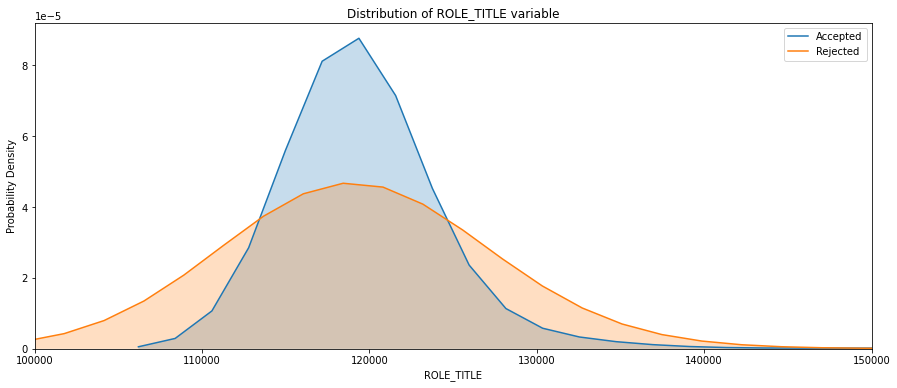

In [50]:
plt.figure(figsize=(15,6));
sb.kdeplot(approved_actions['ROLE_TITLE'],label='Accepted',shade=True);
sb.kdeplot(rejected_actions['ROLE_TITLE'],label='Rejected',shade=True);
plt.title('Distribution of ROLE_TITLE variable');
plt.xlim(100000, 150000)
plt.xlabel('ROLE_TITLE');
plt.ylabel('Probability Density');

Looking at above KDE plot we can say that b/w 110K-130K Approved requests are higher than the rejected ones

ROLE_FAMILY_DESC

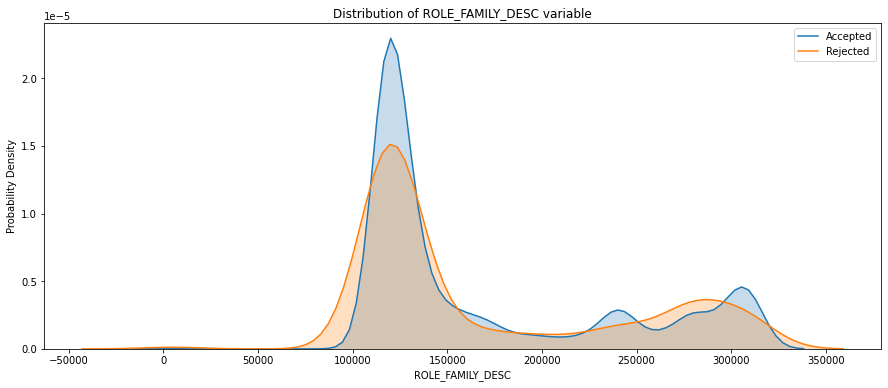

In [51]:
plt.figure(figsize=(15,6));
sb.kdeplot(approved_actions['ROLE_FAMILY_DESC'],label='Accepted',shade=True);
sb.kdeplot(rejected_actions['ROLE_FAMILY_DESC'],label='Rejected',shade=True);
plt.title('Distribution of ROLE_FAMILY_DESC variable');
plt.xlabel('ROLE_FAMILY_DESC');
plt.ylabel('Probability Density');

In [52]:
# Top 5 Approved Actions for attribute ROLE_FAMILY_DESC
approved_actions['ROLE_FAMILY_DESC'].value_counts()[:5]

117906    6437
240983    1189
117913     649
279443     615
117886     478
Name: ROLE_FAMILY_DESC, dtype: int64

In [53]:
# Top 5 Rejected Actions for attribute ROLE_FAMILY_DESC
rejected_actions['ROLE_FAMILY_DESC'].value_counts()[:5]

117906    459
240983     55
117886     52
279443     50
117897     39
Name: ROLE_FAMILY_DESC, dtype: int64

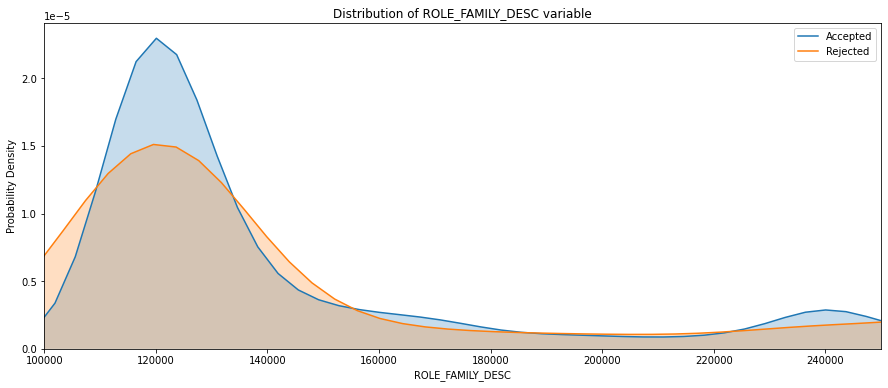

In [54]:
plt.figure(figsize=(15,6));
sb.kdeplot(approved_actions['ROLE_FAMILY_DESC'],label='Accepted',shade=True);
sb.kdeplot(rejected_actions['ROLE_FAMILY_DESC'],label='Rejected',shade=True);
plt.title('Distribution of ROLE_FAMILY_DESC variable');
plt.xlim(100000, 250000)
plt.xlabel('ROLE_FAMILY_DESC');
plt.ylabel('Probability Density');

Looking at above KDE plot we can say that b/w 100K-140K Approved requests are higher than the rejected ones

ROLE_FAMILY

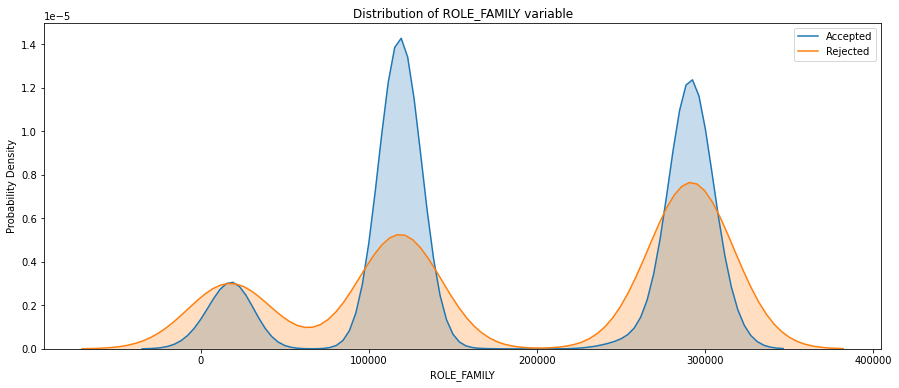

In [55]:
plt.figure(figsize=(15,6));
sb.kdeplot(approved_actions['ROLE_FAMILY'],label='Accepted',shade=True);
sb.kdeplot(rejected_actions['ROLE_FAMILY'],label='Rejected',shade=True);
plt.title('Distribution of ROLE_FAMILY variable');
plt.xlabel('ROLE_FAMILY');
plt.ylabel('Probability Density');

In [56]:
# Top 5 Approved Actions for attribute ROLE_FAMILY
approved_actions['ROLE_FAMILY'].value_counts()[:5]

290919    10347
118424     2616
19721      2393
117887     2302
118398     1232
Name: ROLE_FAMILY, dtype: int64

In [57]:
# Top 5 Rejected Actions for attribute ROLE_FAMILY
rejected_actions['ROLE_FAMILY'].value_counts()[:5]

290919    633
19721     243
292795    181
117887     98
118424     74
Name: ROLE_FAMILY, dtype: int64

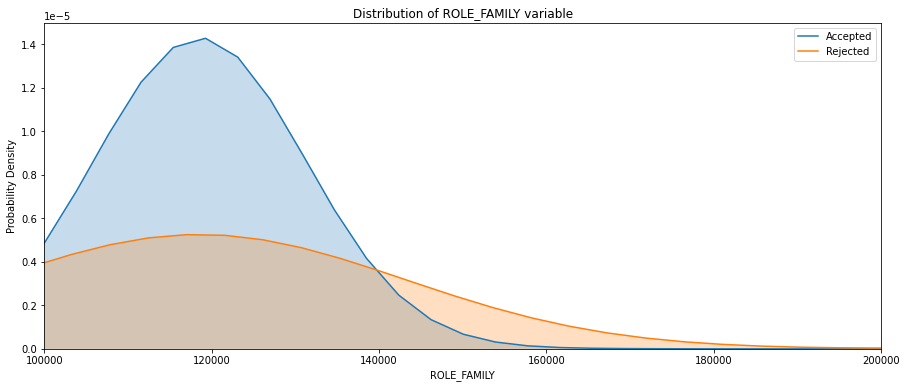

In [58]:
plt.figure(figsize=(15,6));
sb.kdeplot(approved_actions['ROLE_FAMILY'],label='Accepted',shade=True);
sb.kdeplot(rejected_actions['ROLE_FAMILY'],label='Rejected',shade=True);
plt.title('Distribution of ROLE_FAMILY variable');
plt.xlim(100000, 200000)
plt.xlabel('ROLE_FAMILY');
plt.ylabel('Probability Density');

Looking at above KDE plot we can say that b/w 100K-140K Approved requests are higher than the rejected ones

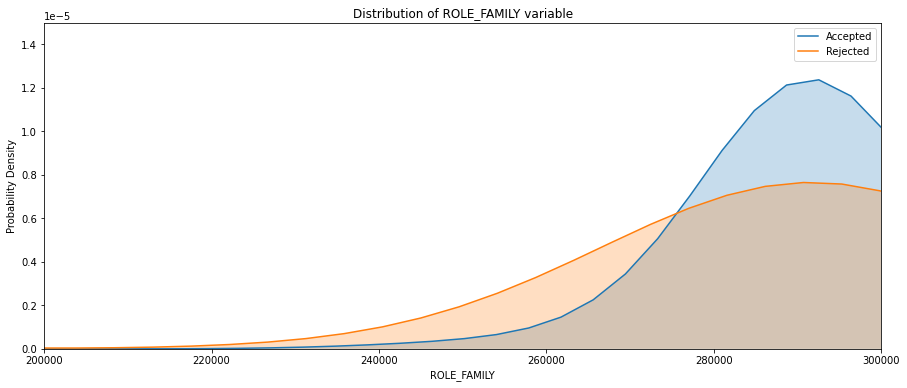

In [59]:
plt.figure(figsize=(15,6));
sb.kdeplot(approved_actions['ROLE_FAMILY'],label='Accepted',shade=True);
sb.kdeplot(rejected_actions['ROLE_FAMILY'],label='Rejected',shade=True);
plt.title('Distribution of ROLE_FAMILY variable');
plt.xlim(200000, 300000)
plt.xlabel('ROLE_FAMILY');
plt.ylabel('Probability Density');

Looking at above KDE plot we can say that b/w 260K-300K Approved requests are higher than the rejected ones

ROLE_CODE

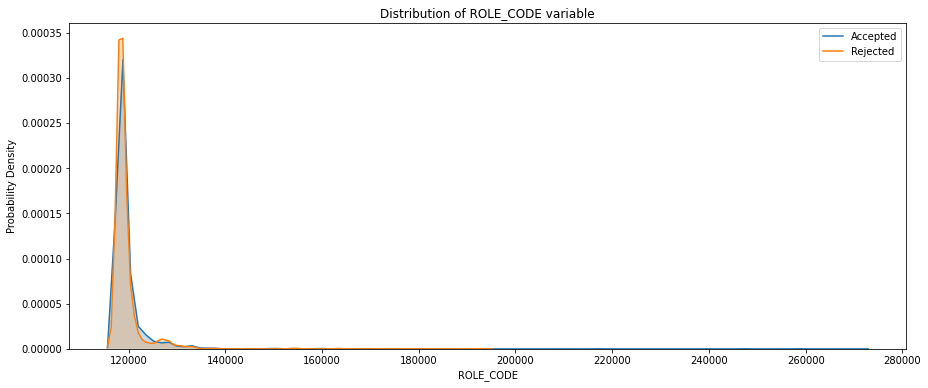

In [60]:
plt.figure(figsize=(15,6));
sb.kdeplot(approved_actions['ROLE_CODE'],label='Accepted',shade=True);
sb.kdeplot(rejected_actions['ROLE_CODE'],label='Rejected',shade=True);
plt.title('Distribution of ROLE_CODE variable');
plt.xlabel('ROLE_CODE');
plt.ylabel('Probability Density');

In [61]:
# Top 5 Approved Actions for attribute ROLE_CODE
approved_actions['ROLE_CODE'].value_counts()[:5]

118322    4279
117908    3467
118786    1647
117880    1117
118570     965
Name: ROLE_CODE, dtype: int64

In [62]:
# Top 5 Rejected Actions for attribute ROLE_CODE
rejected_actions['ROLE_CODE'].value_counts()[:5]

118322    370
117880    139
118786    125
117908    116
118570     78
Name: ROLE_CODE, dtype: int64

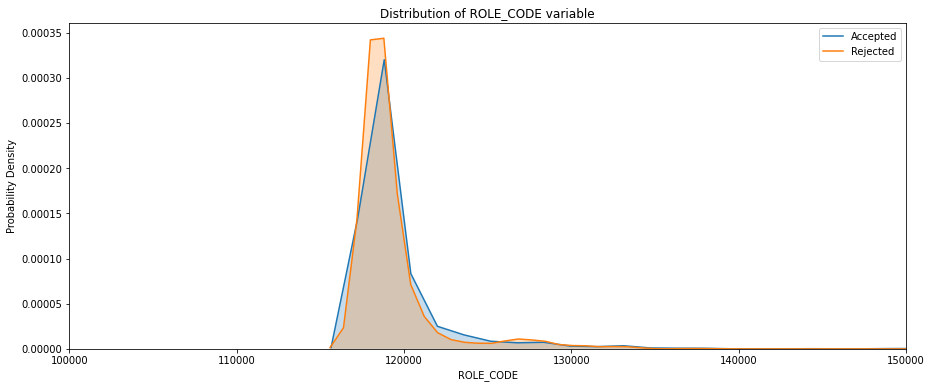

In [63]:
plt.figure(figsize=(15,6));
sb.kdeplot(approved_actions['ROLE_CODE'],label='Accepted',shade=True);
sb.kdeplot(rejected_actions['ROLE_CODE'],label='Rejected',shade=True);
plt.title('Distribution of ROLE_CODE variable');
plt.xlim(100000, 150000)
plt.xlabel('ROLE_CODE');
plt.ylabel('Probability Density');

Looking at above KDE plot we can say that b/w trends are almost similar for both classes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3215f11d30>,
      dtype=object)

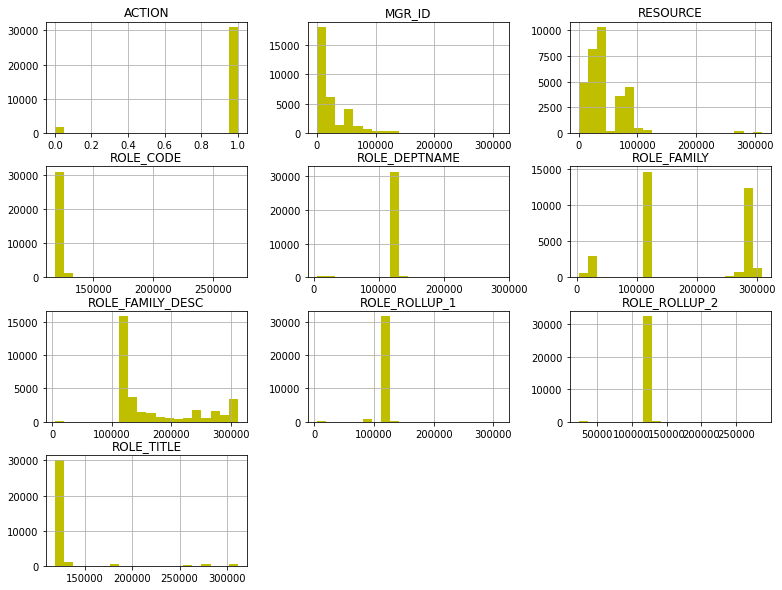

In [64]:
train[['ACTION', 'RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2',
       'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY',
       'ROLE_CODE']].hist(figsize=(13,10),bins=20,color='Y')

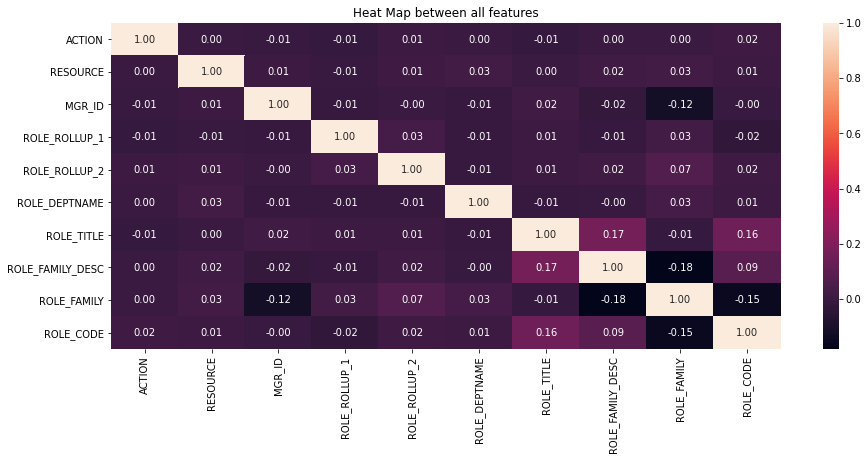

In [65]:
plt.figure(figsize=(15,6));
sb.heatmap(train.corr(), annot=True, fmt='.2f');
plt.title('Heat Map between all features');

### Observation

1. Almost all values are 0 expect corelation b/w (ROLE_FAMILY_DESC, ROLE_TITLE) and (ROLE_CODE, ROLE_TITLE)
2. Corelation b/w ROLE_FAMILY_DESC and ROLE_TITLE is 0.17
3. Corelation b/w ROLE_CODE and ROLE_TITLE is 0.16

<Figure size 1080x432 with 0 Axes>

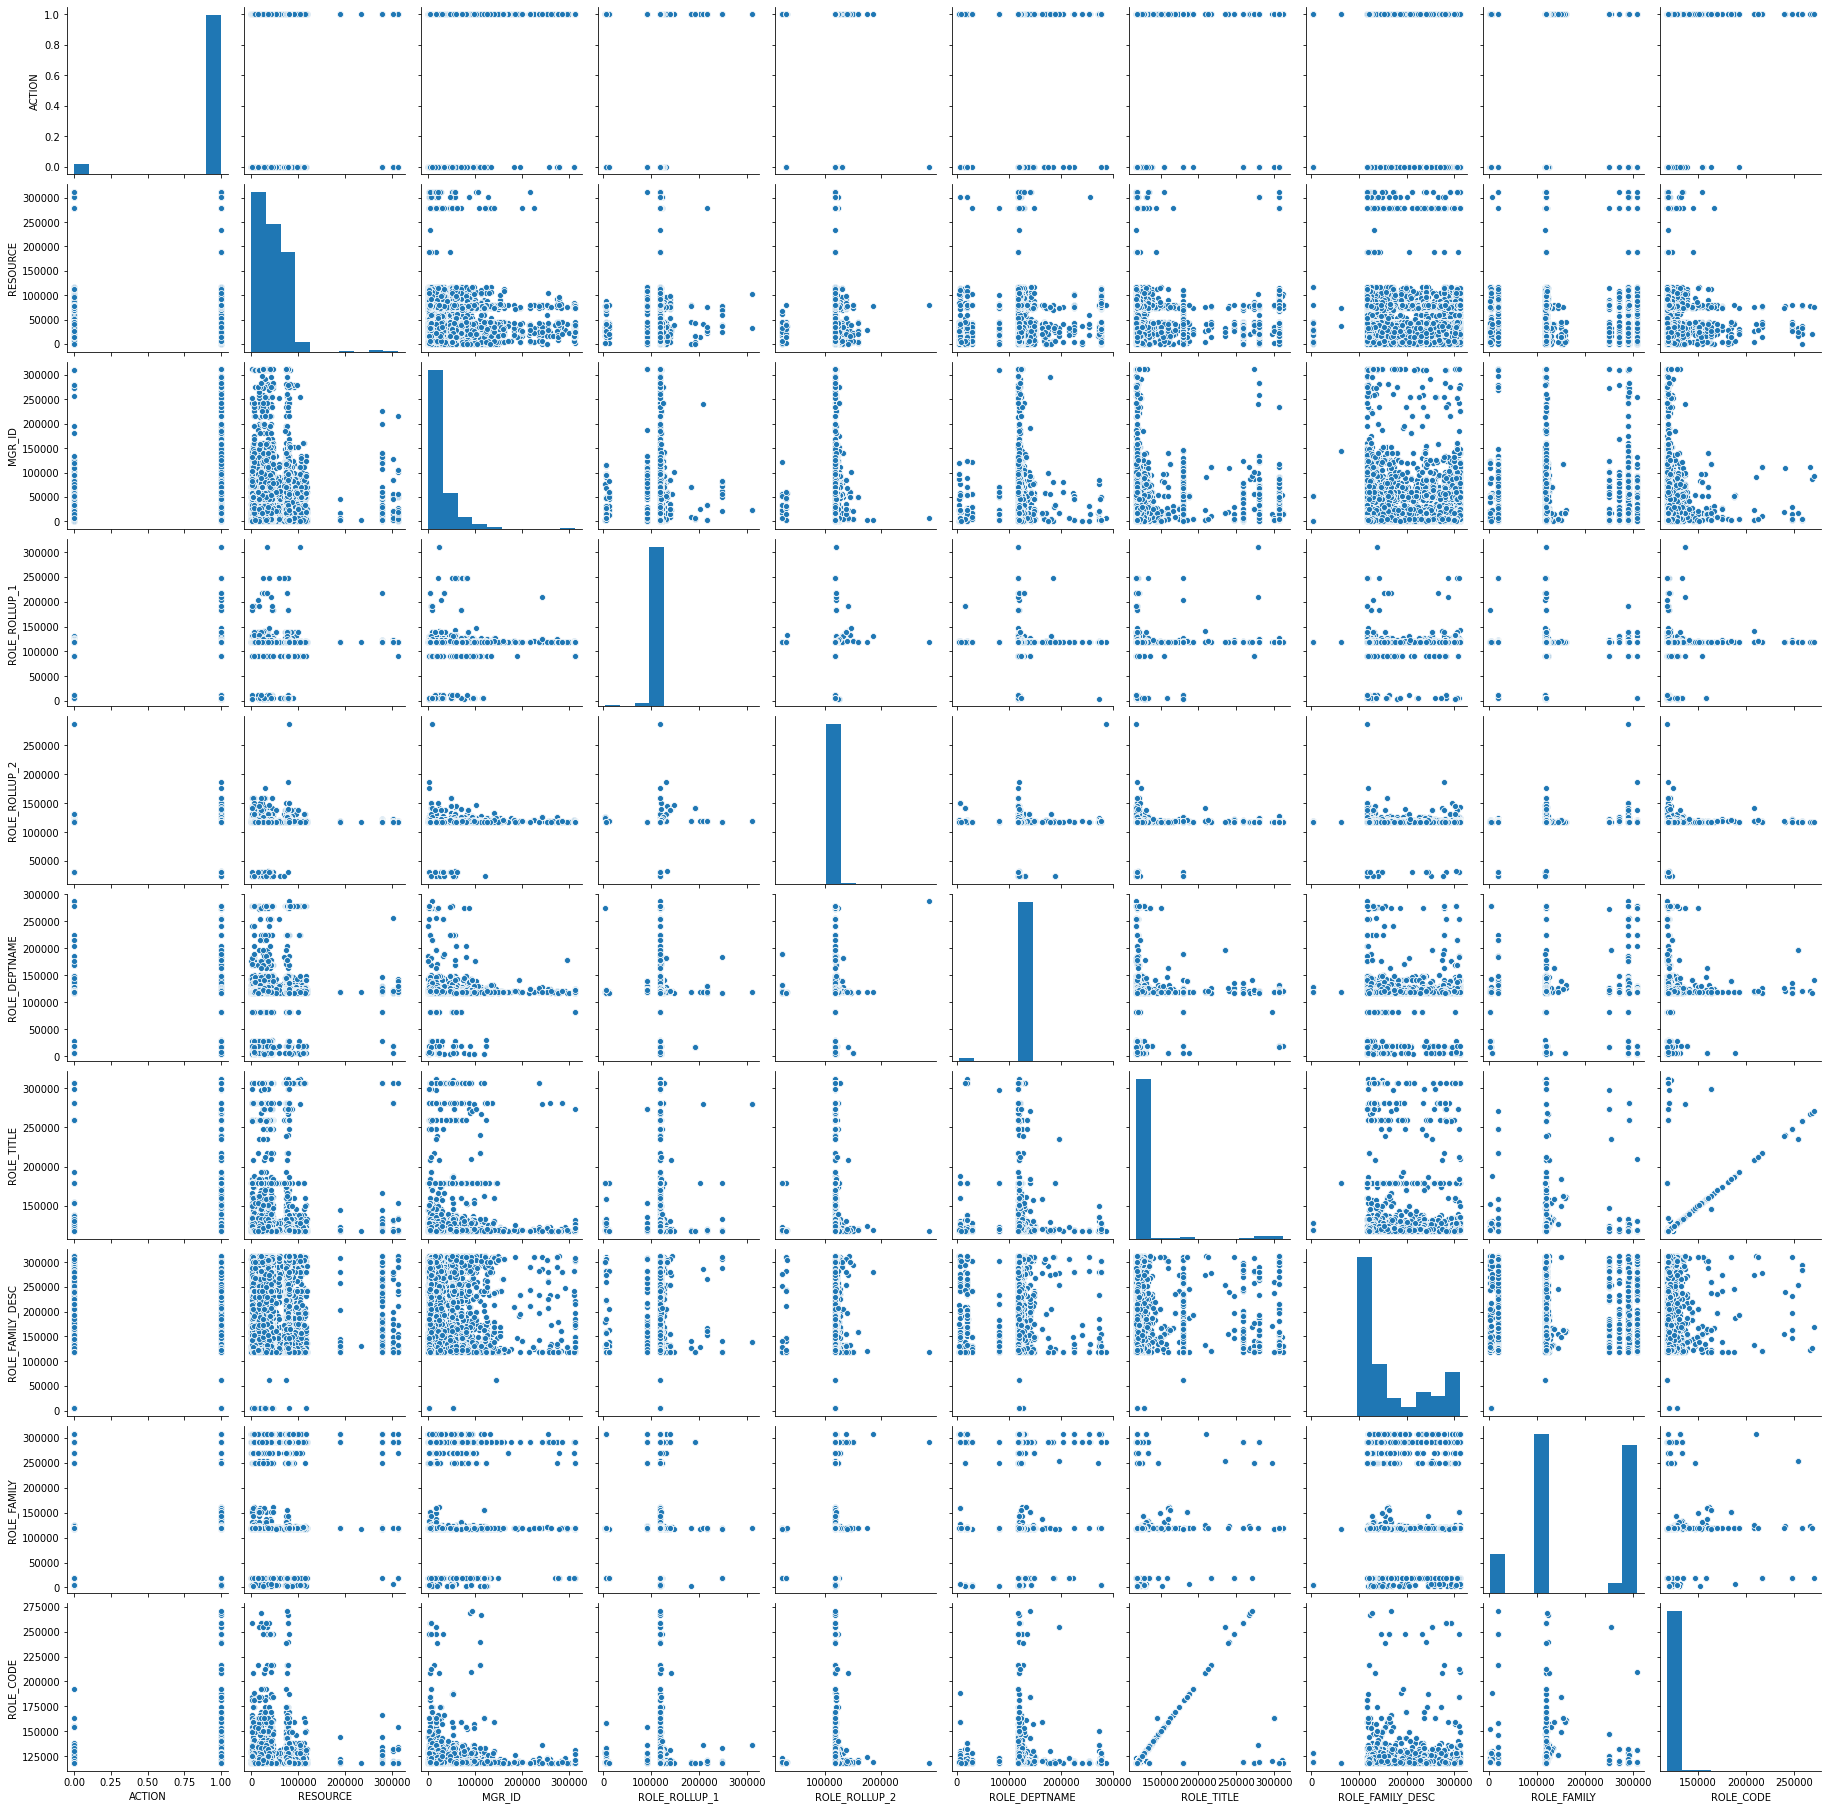

In [67]:
plt.figure(figsize=(15,6))
sb.pairplot(train[['ACTION', 'RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2',
       'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY',
       'ROLE_CODE']])

### Observation:

There is only relationship b/w ROLE_CODE and ROLE_TITLE